# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent.agent import AnomalyAgent

pd.set_option("display.max_colwidth", None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()

{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.258835,0.134025,0.453175
1,2020-01-02,0.989592,0.862004,0.265282
2,2020-01-03,0.819686,0.617805,0.225846
3,2020-01-04,NaN,0.376026,0.579540
4,2020-01-05,0.323573,0.845144,0.656655


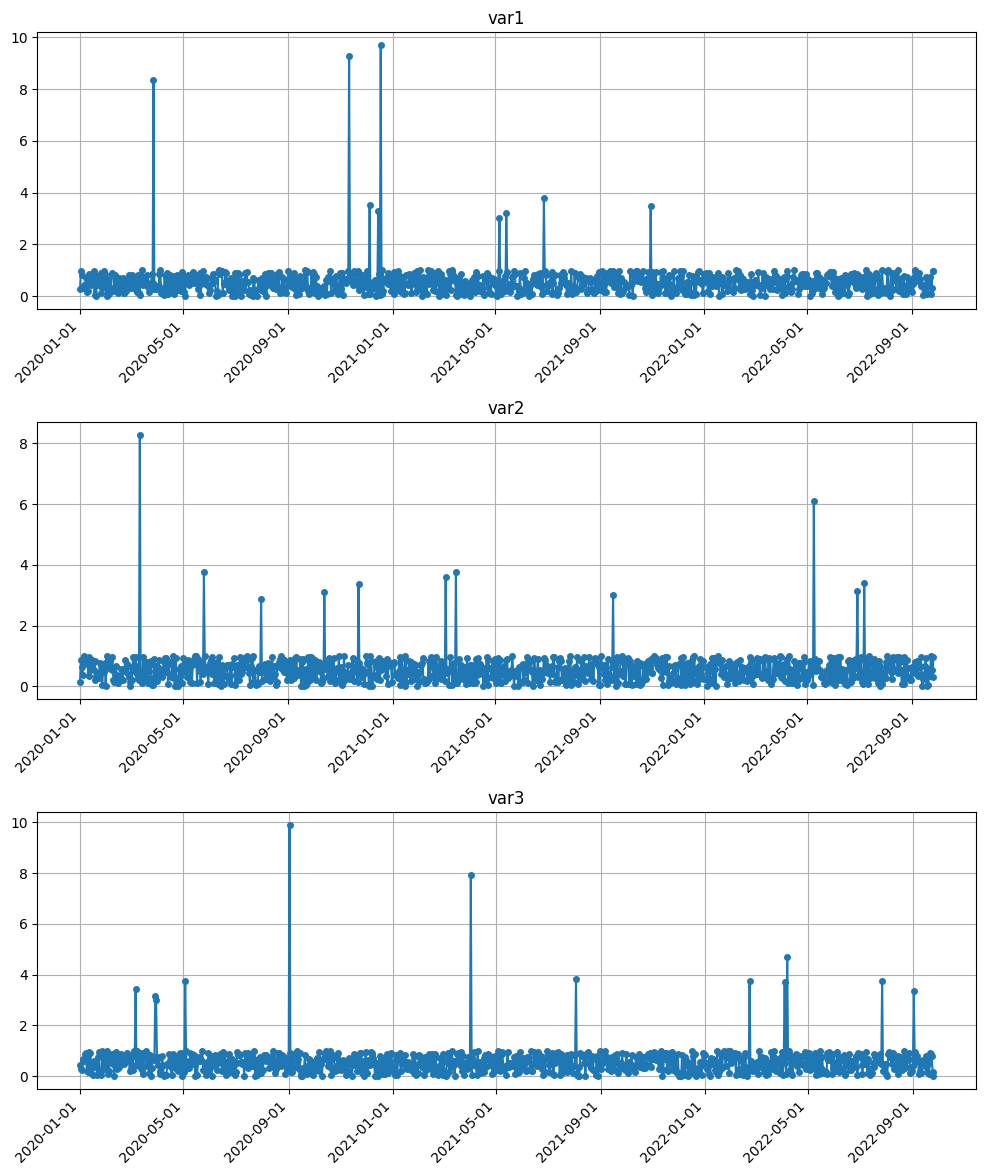

In [3]:
# plot the data
plot_df(df)

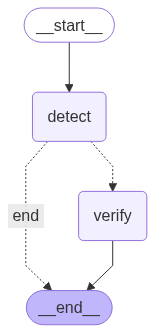

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# Display the graph in Mermaid format
display(Image(anomaly_agent.app.get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# print anomalies
print(anomalies)

{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-01-04 00:00:00', variable_value=0.0, anomaly_description='Null value detected in time series.'), Anomaly(timestamp='2020-03-06 00:00:00', variable_value=3.423988, anomaly_description='Outlier detected, value is significantly higher than the norm.'), Anomaly(timestamp='2020-03-11 00:00:00', variable_value=8.281137, anomaly_description='Outlier detected, value is significantly higher than the norm.'), Anomaly(timestamp='2020-03-27 00:00:00', variable_value=8.348007, anomaly_description='Outlier detected, value is significantly higher than the norm.'), Anomaly(timestamp='2020-11-11 00:00:00', variable_value=9.282979, anomaly_description='Outlier detected, value is significantly higher than the norm.'), Anomaly(timestamp='2020-12-05 00:00:00', variable_value=3.516218, anomaly_description='Outlier detected, value is significantly higher than the norm.'), Anomaly(timestamp='2021-03-04 00:00:00', variable_value=7.909672, anomaly_descript

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.sample(10)

,timestamp,variable_name,value,anomaly_description
6,2021-03-04,var1,7.909672e+00,"Outlier detected, value is significantly higher than the norm."
8,2021-05-06,var1,3.031956e+00,"Outlier detected, value is significantly higher than the norm."
26,2022-09-12,var2,6.796000e-03,Low value detected in var2.
11,2022-09-02,var1,3.358500e+00,"Outlier detected, value is significantly higher than the norm."
3,2020-03-27,var1,8.348007e+00,"Outlier detected, value is significantly higher than the norm."
29,2020-03-11,var3,8.281137e+06,Value is extremely high; possible data quality issue.
2,2020-03-11,var1,8.281137e+00,"Outlier detected, value is significantly higher than the norm."
17,2020-03-29,var2,3.168555e+00,Extreme spike detected in var2.
1,2020-03-06,var1,3.423988e+00,"Outlier detected, value is significantly higher than the norm."
22,2021-07-07,var2,3.412390e+00,Extreme spike detected in var2.


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")
df_anomalies_wide.sample(10)

,timestamp,var1,var1_description,var2,var2_description,var3,var3_description
8,2021-05-06,3.031956,"Outlier detected, value is significantly higher than the norm.",NaN,NaN,NaN,NaN
28,2020-03-06,NaN,NaN,NaN,NaN,3423988.0,Value is significantly higher than normal range.
24,2022-05-09,NaN,NaN,6.093559,Extreme spike detected in var2.,NaN,NaN
27,2020-01-04,NaN,NaN,NaN,NaN,579540.0,Value is unusually high compared to previous data points.
13,2020-01-06,NaN,NaN,0.993734,High spike detected in var2.,NaN,NaN
20,2021-03-04,NaN,NaN,3.612474,Extreme spike detected in var2.,NaN,NaN
2,2020-03-11,8.281137,"Outlier detected, value is significantly higher than the norm.",NaN,NaN,NaN,NaN
10,2022-06-29,3.145137,"Outlier detected, value is significantly higher than the norm.",NaN,NaN,NaN,NaN
32,2021-06-25,NaN,NaN,NaN,NaN,4011432.0,Outlier value in the time series.
25,2022-06-29,NaN,NaN,3.145137,Significant spike detected in var2.,NaN,NaN


In [8]:
# merge anomalies with original data
df_final = df.merge(
    df_anomalies_wide,
    on="timestamp",
    how="left",
    suffixes=("", "_anomaly_flag"),
)

df_final.head()

,timestamp,var1,var2,var3,var1_anomaly_flag,var1_description,var2_anomaly_flag,var2_description,var3_anomaly_flag,var3_description
0,2020-01-01,0.258835,0.134025,0.453175,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,0.989592,0.862004,0.265282,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,0.819686,0.617805,0.225846,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,NaN,0.376026,0.579540,0.0,Null value detected in time series.,NaN,NaN,NaN,NaN
4,2020-01-04,NaN,0.376026,0.579540,NaN,NaN,0.376026,Missing value (NaN) in the time series.,NaN,NaN


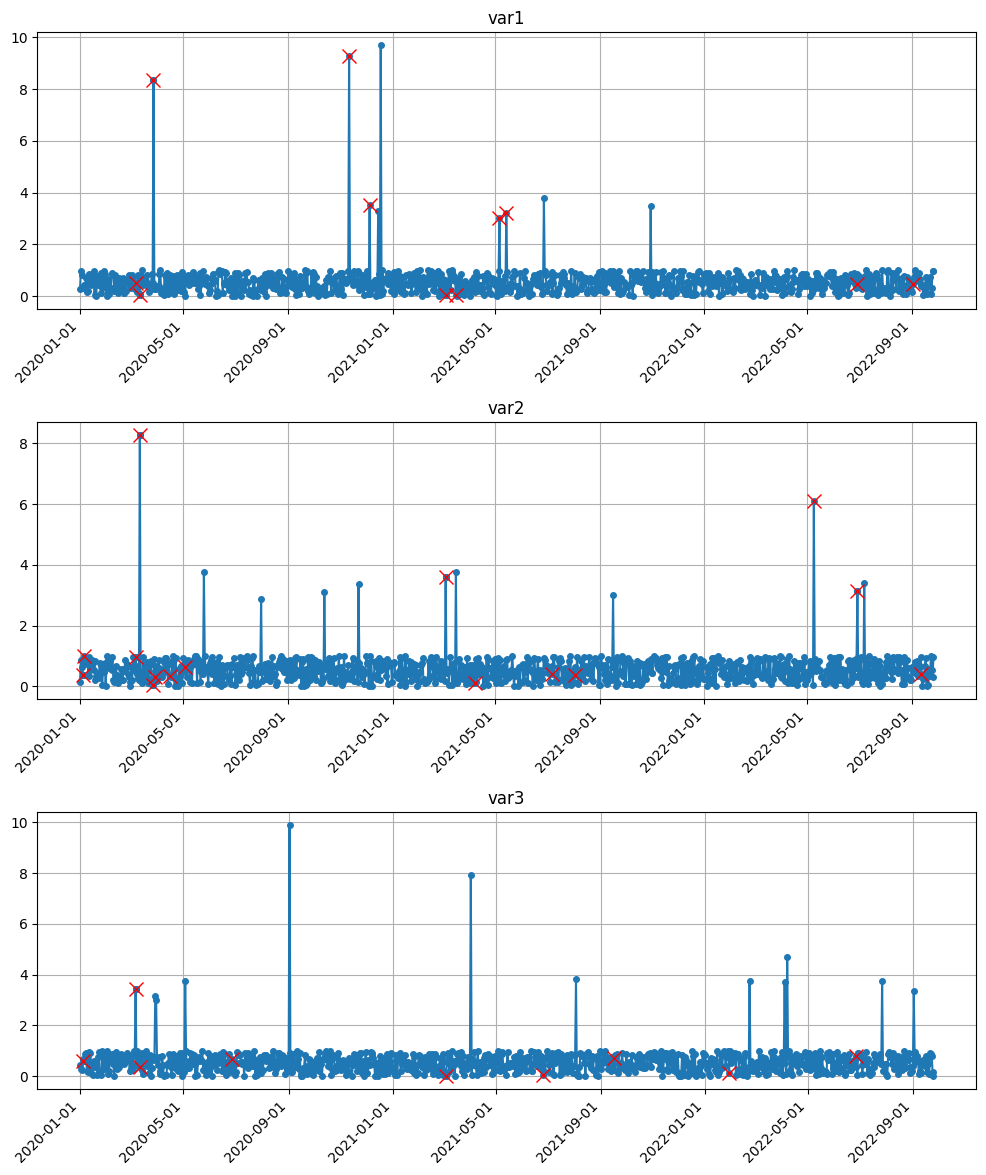

In [9]:
# plot final data with anomalies
plot_df(df_final)